# **Import Library Text-Preprocessing**

In [1]:
# Import Library
import pandas as pd
import re
import string

In [2]:
df = pd.read_csv('Data_Scrape.csv')

In [3]:
df.head(50)

,userName,score,at,content
0,Thony,3,2023-01-16 01:08:16,Akhir-akhir ini tokopedia tambah parah di band...
1,Aries Rudiana,5,2023-01-16 01:04:43,mantap dah
2,Maulana Hasanudin,5,2023-01-16 00:31:57,Ok
3,Meld4 imut,1,2023-01-16 00:27:21,Untuk saat ini Tokopedia bukan mengalami kemaj...
4,Ahmad Al_jawawi,5,2023-01-16 00:00:20,okelah
5,Wahyuningtyas (Wahyuningtyas),5,2023-01-15 23:59:22,great
6,adinda sari,1,2023-01-15 23:48:53,"Tidak memihak customer, barang tidak sesuai de..."
7,Wahid Anssudin,1,2023-01-15 23:39:04,Sangat tidak bagus Fitur chat sangat delay Fit...
8,Bayu L Saputro,1,2023-01-15 23:34:17,Cukup Tau Aja...
9,Deni Amin,1,2023-01-15 23:23:26,Gak jelas ini


5    5170
1    3211
4     631
2     507
3     481
Name: score, dtype: int64

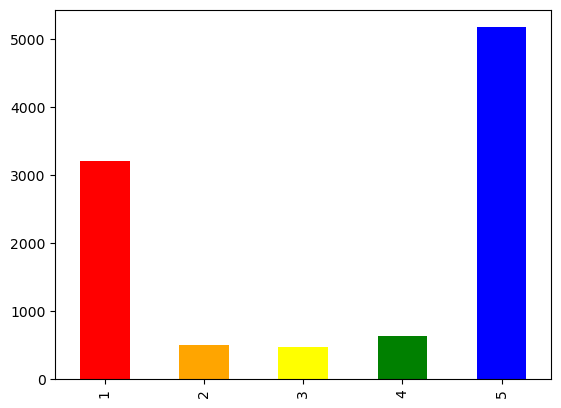

In [4]:
df['score'].value_counts().sort_index().plot.bar(color=['red', 'orange', 'yellow', 'green','blue'])
df['score'].value_counts()

In [5]:
# drop rating of 3 (neutral rating)
df = df[df['score'] != 3]
df['label'] = df['score'] >= 4 # True for Positive, False for Negative
df['label'].replace(True, 'positif', inplace=True)
df['label'].replace(False, 'negatif', inplace=True)
df.head(50)

,userName,score,at,content,label
1,Aries Rudiana,5,2023-01-16 01:04:43,mantap dah,positif
2,Maulana Hasanudin,5,2023-01-16 00:31:57,Ok,positif
3,Meld4 imut,1,2023-01-16 00:27:21,Untuk saat ini Tokopedia bukan mengalami kemaj...,negatif
4,Ahmad Al_jawawi,5,2023-01-16 00:00:20,okelah,positif
5,Wahyuningtyas (Wahyuningtyas),5,2023-01-15 23:59:22,great,positif
6,adinda sari,1,2023-01-15 23:48:53,"Tidak memihak customer, barang tidak sesuai de...",negatif
7,Wahid Anssudin,1,2023-01-15 23:39:04,Sangat tidak bagus Fitur chat sangat delay Fit...,negatif
8,Bayu L Saputro,1,2023-01-15 23:34:17,Cukup Tau Aja...,negatif
9,Deni Amin,1,2023-01-15 23:23:26,Gak jelas ini,negatif
10,SBJ,5,2023-01-15 23:10:43,Aplikasi belanja online yang selalu memberikan...,positif


In [6]:
#label=[]
#for index, row in df.iterrows():
    #if row['score']>=4:
        #label.append('positive')
    #elif row['score']<3:
        #label.append('negative')

#df['label']=label
#df_label=df.drop(columns='score', axis=1)
#df_label

positif    5801
negatif    3718
Name: label, dtype: int64

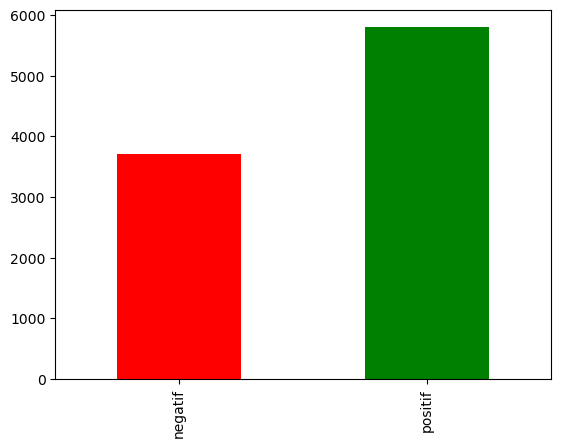

In [7]:
df['label'].value_counts().sort_index().plot.bar(color=['red', 'green']) #red(0) = negative, #green(1) = positive
df['label'].value_counts()

In [8]:
#menghilangkan variabel yang tidak dipakai
df_pre = df.copy()
df_pre = df.drop(columns = ['userName', 'at', 'score'])
df_pre

,content,label
1,mantap dah,positif
2,Ok,positif
3,Untuk saat ini Tokopedia bukan mengalami kemaj...,negatif
4,okelah,positif
5,great,positif
...,...,...
9994,"Aplikasi konyol,gk dapat promo , uda belanja j...",negatif
9995,terbaik,positif
9997,pengguna baru tidak bisa pakai promo,negatif
9998,Saya sudah lama berlangganan toped. Tp untuk s...,negatif


In [9]:
#menyimpan data
df_pre.to_csv("Tokopedia Reviews.csv", index = False)